In [1]:
!pip install yfinance

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#set the asset code to download
tickers = ['SPY', 'QQQ', 'TLT', 'GLD', 'SHY']

#download historical data from 2020 to 2024 (the closing prices)
raw_data = yf.download(tickers, start="2020-01-01", end="2024-07-01",auto_adjust=False)

data = raw_data['Adj Close']

#show the first 5 lines to see what they look like
data.head()

[*********************100%***********************]  5 of 5 completed


Ticker,GLD,QQQ,SHY,SPY,TLT
Date,,,,,
2020-01-02,143.949997,209.091080,75.583588,299.406403,118.028099
2020-01-03,145.860001,207.175781,75.646080,297.139313,119.845764
2020-01-06,147.389999,208.510666,75.619293,298.272858,119.165230
2020-01-07,147.970001,208.481659,75.619293,297.434204,118.579437
2020-01-08,146.860001,210.048630,75.583588,299.019379,117.795517


In [16]:
#calculate daily return (percent change)
returns = data.pct_change().dropna()

#check first few lines
returns.head()

Ticker,GLD,QQQ,SHY,SPY,TLT
Date,,,,,
2020-01-03,0.013269,-0.009160,0.000827,-0.007572,0.015400
2020-01-06,0.010490,0.006443,-0.000354,0.003815,-0.005678
2020-01-07,0.003935,-0.000139,0.000000,-0.002812,-0.004916
2020-01-08,-0.007502,0.007516,-0.000472,0.005329,-0.006611
2020-01-09,-0.005652,0.008474,0.000118,0.006781,0.003510


In [17]:
#calculate annualized mean returns (average daily return * 252 trading days)
mean_returns = returns.mean() * 252

#calculate annualized covariance matrix (used to measure portfolio risk/volatility)
cov_matrix = returns.cov() * 252

#display results
print("Annualized Mean Returns:")
print(mean_returns)

print("\nAnnualized Covariance Matrix:")
print(cov_matrix)

Annualized Mean Returns:
Ticker
GLD    0.101655
QQQ    0.218288
SHY    0.007850
SPY    0.154170
TLT   -0.049419
dtype: float64

Annualized Covariance Matrix:
Ticker       GLD       QQQ       SHY       SPY       TLT
Ticker                                                  
GLD     0.024150  0.006541  0.001091  0.005004  0.007697
QQQ     0.006541  0.068582  0.000247  0.052700 -0.004132
SHY     0.001091  0.000247  0.000372  0.000049  0.002057
SPY     0.005004  0.052700  0.000049  0.046828 -0.006151
TLT     0.007697 -0.004132  0.002057 -0.006151  0.033630


In [19]:
import numpy as np

#set number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))  #rows: return, volatility, sharpe ratio
weights_record = []

#assume risk-free rate is 2% (for Sharpe ratio calculation)
risk_free_rate = 0.02

#reproducibility
np.random.seed(42)

#randomly generate portfolio weights
for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)

#calculate expected portfolio return and volatility
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

#calculate Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

#store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio

#convert results to dataframe
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

#find portfolios with max Sharpe and min volatility
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_vol_idx = results_df['Volatility'].idxmin()

#get corresponding weights
max_sharpe_weights = weights_record[max_sharpe_idx]
min_vol_weights = weights_record[min_vol_idx]

#results_df: contains the return, volatility and Sharpe ratio of each portfolio
#max_sharpe_weights: the weight of the best portfolio
#min_vol_weights: the weight of the most stable portfolio

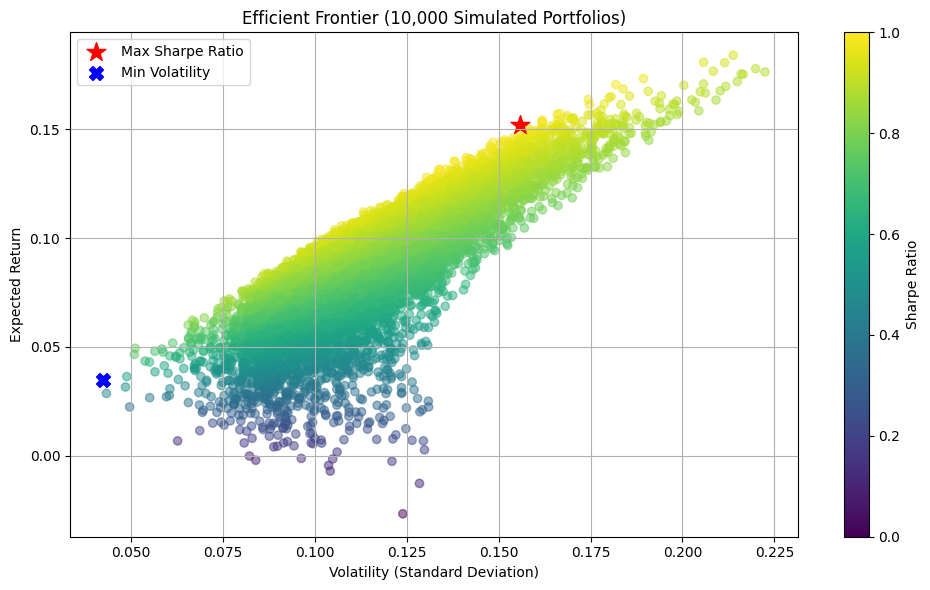

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

#scatter plot: risk and return of each simulated portfolio
plt.scatter(results_df['Volatility'], results_df['Return'],
            c=results_df['Sharpe Ratio'], cmap='viridis', alpha=0.5)

#best Sharpe Ratio combination: Red Star
plt.scatter(results_df.loc[max_sharpe_idx]['Volatility'],
            results_df.loc[max_sharpe_idx]['Return'],
            marker='*', color='r', s=200, label='Max Sharpe Ratio')

#minimum Volatility Combination: Blue Cross
plt.scatter(results_df.loc[min_vol_idx]['Volatility'],
            results_df.loc[min_vol_idx]['Return'],
            marker='X', color='blue', s=100, label='Min Volatility')

plt.title('Efficient Frontier (10,000 Simulated Portfolios)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()